#### Домашнее задание по теме "Работа с переменными"
Задание


Потренируем навыки, полученные на практическом занятии. Пользуясь новыми знаниями, проведите эксплоративный анализ данных на данных недвижимости Бостона, и попытайтесь обучить линейную модель наиболее качественно. Все ваши действия и решения описывайте в markdown.

Данные вы сможете получить исполнив следующий код:
from sklearn.datasets import load_boston
import pandas as pd
data = pd.read_csv(load_boston()[‘filename’], skiprows=1)
Переменная, которую надо предсказать - ’MEDV’.
Прочитать информацию о содержимом датасета:
print(load_boston()[‘DESCR’])
Если вы неудовлетворенны результатом, но лучшего решения предложить не можете, то высылайте задание на проверку.
Цель задания - закрепить полученные навыки.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

# увеличим размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13,8

In [2]:
from sklearn.datasets import load_boston 
data = pd.read_csv(load_boston()['filename'], skiprows=1)   # skiprows пропуск 1 строчки, перенос заголовка
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
# посмотрим, что содержится в датасете
load_boston().keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
# посмотрим на пропуски в данных (Missing Attribute Values: None)
data.isnull().sum()
# пропусков нет

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Наш датасет имеет только числовые значения, категориальных нет.

In [7]:
# смотрим инфо по количеству каждого значения всех столбцов
columns = data.columns

for column in columns:
    print(column)
    print(data[column].value_counts(dropna=False))

CRIM
0.01501     2
14.33370    2
0.57834     1
0.06127     1
0.03548     1
           ..
0.25356     1
0.10469     1
0.22876     1
0.34109     1
0.26363     1
Name: CRIM, Length: 504, dtype: int64
ZN
0.0      372
20.0      21
80.0      15
12.5      10
25.0      10
22.0      10
40.0       7
30.0       6
45.0       6
90.0       5
95.0       4
21.0       4
60.0       4
33.0       4
28.0       3
52.5       3
75.0       3
34.0       3
35.0       3
70.0       3
55.0       3
82.5       2
85.0       2
17.5       1
100.0      1
18.0       1
Name: ZN, dtype: int64
INDUS
18.10    132
19.58     30
8.14      22
6.20      18
21.89     15
        ... 
4.15       1
1.76       1
1.38       1
2.01       1
1.89       1
Name: INDUS, Length: 76, dtype: int64
CHAS
0    471
1     35
Name: CHAS, dtype: int64
NOX
0.538    23
0.713    18
0.437    17
0.871    16
0.624    15
         ..
0.518     1
0.394     1
0.435     1
0.385     1
0.422     1
Name: NOX, Length: 81, dtype: int64
RM
6.167    3
6.405    3
5.713  

In [8]:
# смотрим количество уникальных значений каждого столбца
data.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [9]:
X = data.drop(['MEDV'], axis=1)
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [10]:
y = data['MEDV']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

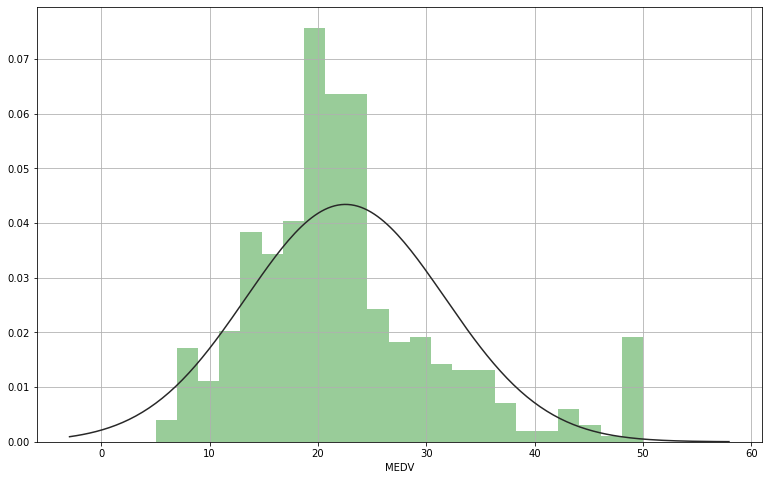

In [11]:
# график распределения с гистограммой и максимальным правдоподобием гауссовского распределения
from scipy.stats import norm

sns.distplot(y, fit=norm, kde=False, color='g')
plt.grid()

Целевая переменная распределена почти нормально с небольшим количеством выбросов

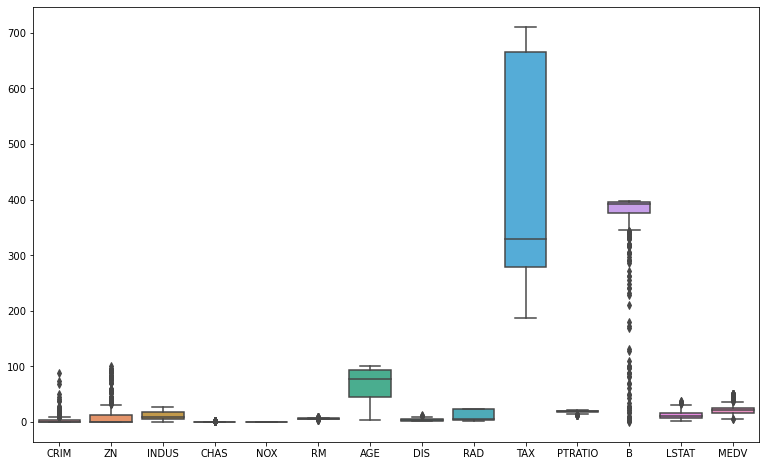

In [12]:
# boxplot

sns.boxplot(data=data)

Больших единичных выбросов не наблюдаю. Есть длинный хвост у 'B', поменьше у 'CRIM', 'ZN'.
'TAX' и 'B' большей размерности, чем другие признаки, нужно масштабирование(стандартизирование).

In [13]:
# смотрим на выбросы, линейные зависимости

#sns.pairplot(data)

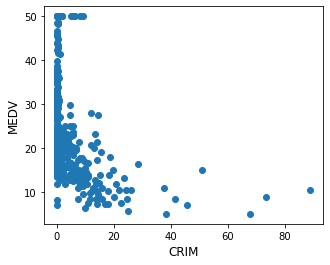

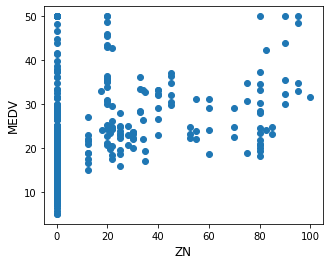

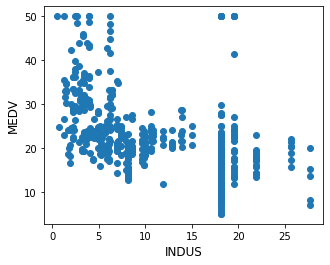

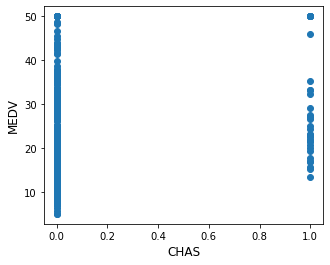

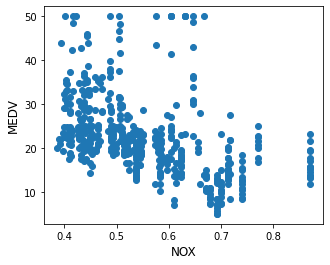

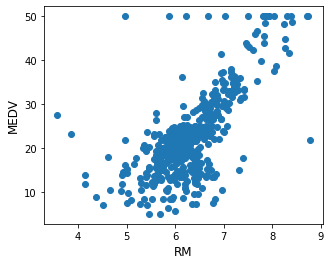

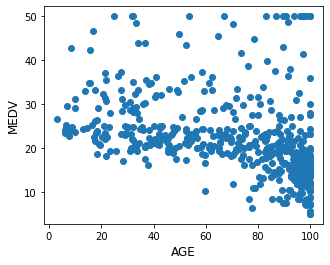

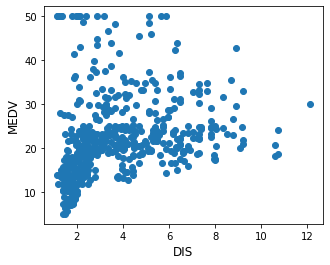

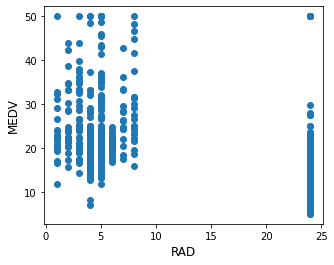

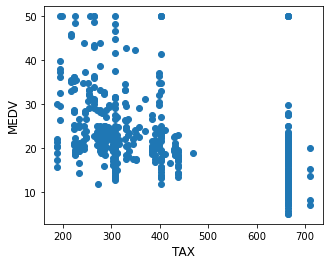

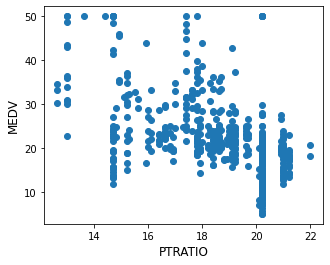

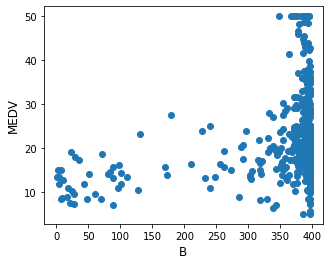

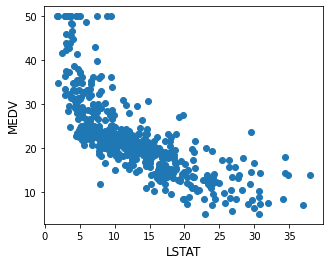

In [14]:
# приближено
for col in data.iloc[:,:-1]:
    plt.figure(figsize=(5,4))
    plt.scatter(data[col], data['MEDV'])
    plt.ylabel('MEDV', size=12)
    plt.xlabel(col, size=12)
    plt.show()

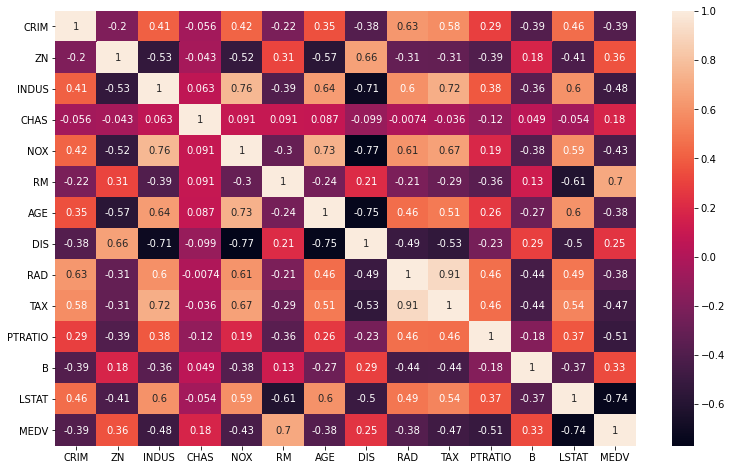

In [15]:
# матрица корреляции, которая измеряет линейные отношения между переменными
sns.heatmap(data=data.corr(), cbar=True, annot=True)

# sns.heatmap(data.corr())  # тепловая карта без данных

Коэффициент корреляции варьируется [-1,1]. Если значение близко к |1|, это означает, что между двумя переменными существует сильная положительная (+1) или отрицательная (-1) корреляция.

'RAD' и 'TAX', 'DIS' И 'AGE' имеют высокую корреляцию между собой (первые положительную, вторые - отрицательную), один из этих признаков в паре можно удалить. 

С целевой переменной более всего скореллированы 'RM' (прямая) и 'LSTAT' (обратная), наименее скоррелирована 'CHAS'

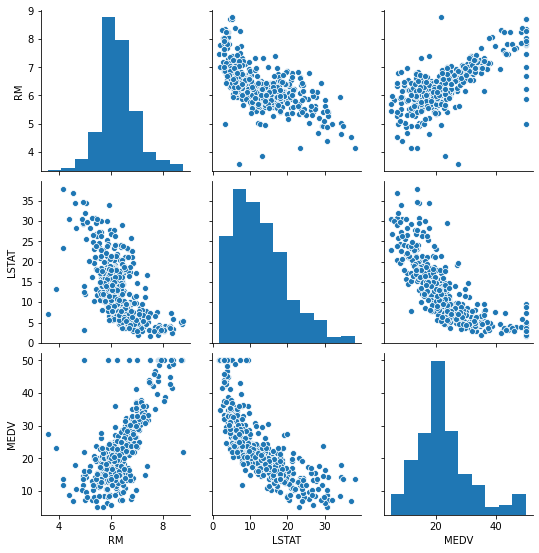

In [16]:
sns.pairplot(data[['RM', 'LSTAT', 'MEDV']])

'MEDV' и 'RM' имеет, похоже, линейную зависимость. А 'MEDV' и 'LSTAT', хоть и пропорциональны (обратно), но зависимость не совсем линейная, нужно использовать полиномиальную регрессию.

In [17]:
# В нашем датасете только числовые признаки, категориальных нет.
# Стандартизируем наш датасет

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()


X = pd.DataFrame(sc.fit_transform(data.iloc[:,:-1]), columns = data.iloc[:,:-1].columns)
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


In [18]:
# Будем использовать линейную регрессию для тестирования качества данных

class prediction:
    
    def _init_(self):
        self= self
        
    def get_score(self, X, y, model=None, random_seed=42):
        self.model = model
        self.X = X
        self.y = y
        if self.model is None:
            self.model = LinearRegression()
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.3, random_state=random_seed )
        self.X_test = X_test
        self.y_test = y_test
        self.model.fit(X_train, y_train)
        return self.model.score(X_test, y_test)

    def plot(self):
        plt.figure(figsize=(5,4))
        predictions = self.model.predict(self.X_test)
        sns.set_style('dark')
        plot = sns.scatterplot(self.y_test, predictions)
        plot.set(xlabel='Given', ylabel='Prediction')
        x_plot = np.linspace(-5,50,100)
        y_plot = x_plot
        plt.plot(x_plot, y_plot, color='r')
        plt.grid()
        plt.show()

0.7112260057484923


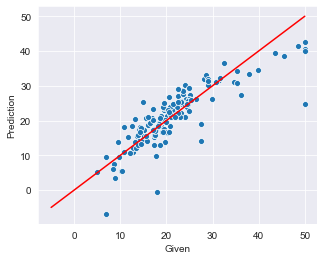

In [19]:
p = prediction()
print(p.get_score(X=data.iloc[:,:-1], y=y))   # первоначальный датафрейм
p.plot()

0.7112260057484925


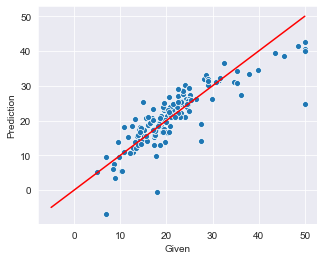

In [20]:
print(p.get_score(X=X, y=y))   # после стандартизации, разница несущественная
p.plot()    

Изменим нашу модель, добавим через make_pipeline стандартизацию, cross_val_score 

In [21]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score


class prediction:
    
    def _init_(self):
        self= self
        
    def get_score(self, X, y, pipe_model=None, random_seed=42):
        self.X = X
        self.y = y
        self.pipe_model = pipe_model
        if self.pipe_model is None:
            self.pipe_model = make_pipeline(StandardScaler(),LinearRegression())
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.3, random_state=random_seed )
        self.X_test = X_test
        self.y_test = y_test
        self.X_train = X_train
        self.y_train = y_train
        self.pipe_model.fit(X_train, y_train)
        return self.pipe_model.score(X_test, y_test)
    
    def cross(self):
        kf = KFold(n_splits=10)
        scores = cross_val_score(self.pipe_model, self.X_train, self.y_train, cv=kf)
        return scores.mean(), scores

    def plot(self):
        plt.figure(figsize=(5,4))
        predictions = self.pipe_model.predict(self.X_test)
        sns.set_style('dark')
        plot = sns.scatterplot(self.y_test, predictions)
        plot.set(xlabel='Given', ylabel='Prediction')
        x_plot = np.linspace(-5,50,100)
        y_plot = x_plot
        plt.plot(x_plot, y_plot, color='r')
        plt.grid()
        plt.show()

model.score =  0.7112260057484934
cross_val_score:  (0.6875346951141131, array([0.70959865, 0.76558212, 0.22459595, 0.79719424, 0.74179327,
       0.78747687, 0.80023421, 0.73001495, 0.77970143, 0.53915526]))


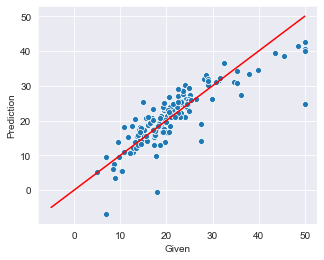

In [22]:
p = prediction()
print('model.score = ', p.get_score(X=data.iloc[:,:-1], y=y))  
print('cross_val_score: ', p.cross())
p.plot()

In [23]:
# прологарифмируем признаки с большими выбросами, хвостами и широким диапазоном значений: 'TAX', 'B'

data['B'] = np.log(data['B'] + 1).to_numpy() 
data['CRIM'] = np.log(data['CRIM'] + 1).to_numpy()
data['ZN'] = np.log(data['ZN'] + 1).to_numpy()

model.score =  0.7082882191598399
cross_val_score:  (0.6813668631414914, array([0.68056333, 0.7647355 , 0.23426148, 0.75005367, 0.74452659,
       0.79086109, 0.81320408, 0.7200618 , 0.76915253, 0.54624856]))


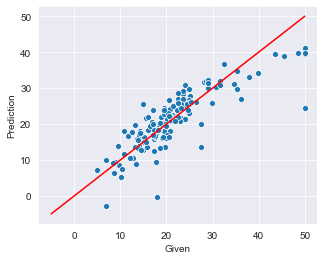

In [24]:
print('model.score = ', p.get_score(X=data.iloc[:,:-1], y=y))  
print('cross_val_score: ', p.cross())
p.plot()

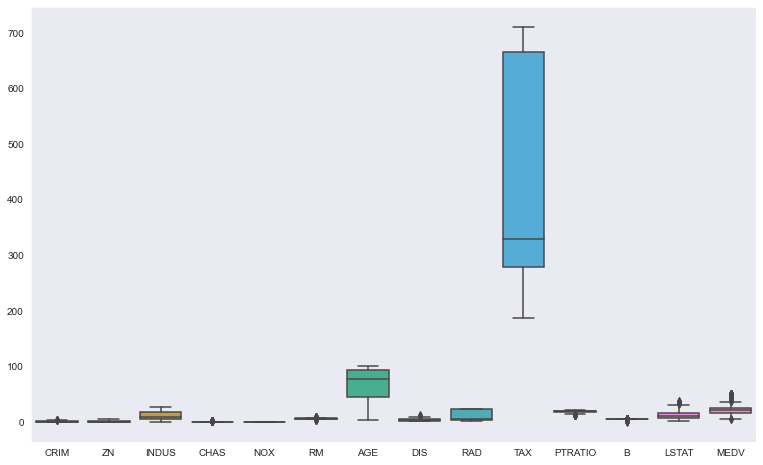

In [25]:
# boxplot после логарифмирования

sns.boxplot(data=data)

In [26]:
# поработаем с выбросами 'LSTAT', 'DIS'
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.813418,0.953873,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,5.759511,12.653063,22.532806
std,1.022731,1.620831,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,0.729424,7.141062,9.197104
min,0.006300,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.277632,1.730000,5.000000
25%,0.078853,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,5.930593,6.950000,17.025000
50%,0.228336,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,5.972384,11.360000,21.200000
75%,1.542674,2.602690,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,5.984503,16.955000,25.000000
max,4.499545,4.615121,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,5.986201,37.970000,50.000000


In [27]:
sorted(data.LSTAT.unique())

[1.73,
 1.92,
 1.98,
 2.47,
 2.87,
 2.88,
 2.94,
 2.96,
 2.97,
 2.98,
 3.01,
 3.11,
 3.13,
 3.16,
 3.26,
 3.32,
 3.33,
 3.53,
 3.54,
 3.56,
 3.57,
 3.59,
 3.7,
 3.73,
 3.76,
 3.81,
 3.92,
 3.95,
 4.03,
 4.08,
 4.14,
 4.16,
 4.21,
 4.32,
 4.38,
 4.45,
 4.5,
 4.54,
 4.56,
 4.59,
 4.61,
 4.63,
 4.67,
 4.69,
 4.7,
 4.73,
 4.74,
 4.81,
 4.82,
 4.84,
 4.85,
 4.86,
 4.97,
 4.98,
 5.03,
 5.04,
 5.08,
 5.1,
 5.12,
 5.19,
 5.21,
 5.25,
 5.28,
 5.29,
 5.33,
 5.39,
 5.49,
 5.5,
 5.52,
 5.57,
 5.64,
 5.68,
 5.7,
 5.77,
 5.81,
 5.89,
 5.9,
 5.91,
 5.98,
 5.99,
 6.05,
 6.07,
 6.12,
 6.15,
 6.19,
 6.21,
 6.27,
 6.29,
 6.36,
 6.43,
 6.47,
 6.48,
 6.53,
 6.56,
 6.57,
 6.58,
 6.59,
 6.62,
 6.65,
 6.68,
 6.72,
 6.73,
 6.75,
 6.78,
 6.86,
 6.87,
 6.9,
 6.92,
 6.93,
 7.01,
 7.12,
 7.14,
 7.18,
 7.19,
 7.2,
 7.22,
 7.26,
 7.34,
 7.37,
 7.39,
 7.43,
 7.44,
 7.51,
 7.53,
 7.54,
 7.56,
 7.6,
 7.67,
 7.7,
 7.73,
 7.74,
 7.79,
 7.83,
 7.85,
 7.88,
 7.9,
 8.01,
 8.05,
 8.1,
 8.16,
 8.2,
 8.23,
 8.26,
 8.43,
 8.44,

In [28]:
# возьмем 'LSTAT' < 20

data = data.loc[(data.LSTAT <20) & (data.DIS < 8)]

In [29]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006300,2.944439,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,5.986201,4.98,24.0
1,0.026944,0.000000,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,5.986201,9.14,21.6
2,0.026924,0.000000,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,5.975919,4.03,34.7
3,0.031857,0.000000,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,5.980479,2.94,33.4
4,0.066770,0.000000,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.986201,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.060747,0.000000,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,5.973784,9.67,22.4
502,0.044275,0.000000,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,5.986201,9.08,20.6
503,0.058986,0.000000,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.986201,5.64,23.9
504,0.103991,0.000000,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,5.977492,6.48,22.0


In [30]:
sorted(data.LSTAT.unique())

[1.73,
 1.92,
 1.98,
 2.47,
 2.87,
 2.88,
 2.94,
 2.96,
 2.97,
 2.98,
 3.01,
 3.11,
 3.13,
 3.16,
 3.26,
 3.32,
 3.33,
 3.53,
 3.56,
 3.57,
 3.59,
 3.7,
 3.73,
 3.76,
 3.81,
 3.92,
 3.95,
 4.03,
 4.08,
 4.14,
 4.16,
 4.21,
 4.32,
 4.38,
 4.45,
 4.54,
 4.56,
 4.59,
 4.61,
 4.63,
 4.67,
 4.69,
 4.7,
 4.73,
 4.74,
 4.82,
 4.84,
 4.85,
 4.86,
 4.97,
 4.98,
 5.03,
 5.04,
 5.08,
 5.1,
 5.12,
 5.19,
 5.21,
 5.25,
 5.28,
 5.29,
 5.33,
 5.39,
 5.49,
 5.5,
 5.52,
 5.64,
 5.68,
 5.7,
 5.81,
 5.9,
 5.91,
 5.98,
 6.05,
 6.07,
 6.12,
 6.15,
 6.19,
 6.21,
 6.27,
 6.29,
 6.36,
 6.43,
 6.47,
 6.48,
 6.53,
 6.56,
 6.58,
 6.59,
 6.62,
 6.65,
 6.68,
 6.72,
 6.73,
 6.75,
 6.78,
 6.86,
 6.87,
 6.9,
 6.92,
 6.93,
 7.01,
 7.12,
 7.14,
 7.18,
 7.19,
 7.2,
 7.22,
 7.26,
 7.34,
 7.37,
 7.39,
 7.43,
 7.44,
 7.51,
 7.53,
 7.54,
 7.56,
 7.6,
 7.67,
 7.7,
 7.73,
 7.74,
 7.79,
 7.83,
 7.85,
 7.88,
 7.9,
 8.01,
 8.05,
 8.1,
 8.16,
 8.2,
 8.23,
 8.26,
 8.43,
 8.44,
 8.47,
 8.51,
 8.58,
 8.61,
 8.65,
 8.67,
 8.77,
 8.79

model.score =  0.7548531031501036
cross_val_score:  (0.6669790383565031, array([0.81686422, 0.72002281, 0.62365124, 0.82998621, 0.70532343,
       0.63182863, 0.57168107, 0.58654372, 0.45364041, 0.73024865]))


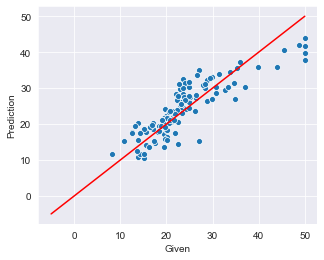

In [31]:
print('model.score = ', p.get_score(X=data.iloc[:,:-1], y=data.MEDV))  
print('cross_val_score: ', p.cross())
p.plot()

model.score =  0.7225012611797449
cross_val_score:  (0.5920386964066486, array([0.71366194, 0.73239462, 0.48124229, 0.79738968, 0.55982373,
       0.57895322, 0.43954827, 0.47675825, 0.43056435, 0.71005062]))


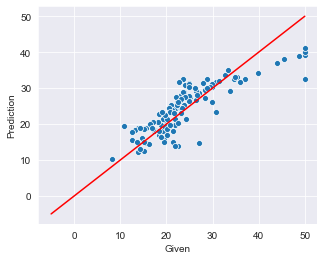

In [32]:
# если оставим только самые скоррелированные признаки

print('model.score = ', p.get_score(X=data[['RM', 'LSTAT']], y=data.MEDV))  
print('cross_val_score: ', p.cross())
p.plot()

Качество модели упало, значит, этих столбцов мало

Уберем из X 'CHAS' как наименее коррелированную величину для y. Уберем из пар ('RAD' и 'TAX' ;'DIS' и 'AGE') 'DIS' и 'RAD', как зависимые между собой признаки и наимее скоррелированные для y.

model.score =  0.7609350747008764
cross_val_score:  (0.603377895804232, array([0.73204321, 0.71111712, 0.51153856, 0.78323863, 0.60546345,
       0.62377977, 0.51438346, 0.4277157 , 0.45560701, 0.66889203]))


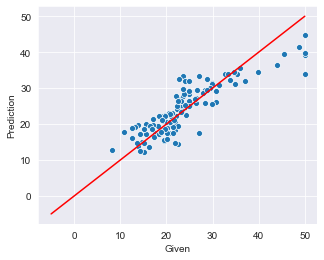

In [33]:
print('model.score = ', p.get_score(X=data.drop(['CHAS', 'DIS', 'RAD', 'MEDV'], axis=1), y=data.MEDV))  
print('cross_val_score: ', p.cross())
p.plot()

Результат падает. Вернемся к полному датасету data.